**Importing neccessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imshow,imread

**Training dataset**

In [2]:
trainset=pd.read_csv("/content/drive/MyDrive/emnist-balanced-train.csv")
trainset.head(30)

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
trainset.columns

Index(['45', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.524', '0.525', '0.526', '0.527', '0.528', '0.529', '0.530', '0.531',
       '0.532', '0.533'],
      dtype='object', length=785)

In [4]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112799 entries, 0 to 112798
Columns: 785 entries, 45 to 0.533
dtypes: int64(785)
memory usage: 675.6 MB


In [5]:
trainset['45'].unique()

array([36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3, 40,
       14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31, 16,
        7,  2,  8, 10,  6, 27, 45, 33, 11, 18, 41,  0, 21])

**Testing Dataset**

In [6]:
testset=pd.read_csv("/content/drive/MyDrive/emnist-balanced-test.csv")
testset.head()

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18799 entries, 0 to 18798
Columns: 785 entries, 41 to 0.532
dtypes: int64(785)
memory usage: 112.6 MB


In [8]:
trainset['45'].unique()

array([36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3, 40,
       14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31, 16,
        7,  2,  8, 10,  6, 27, 45, 33, 11, 18, 41,  0, 21])

In [9]:
testset['41'].unique()

array([39,  9, 26, 44, 33, 14, 11,  3, 12, 16,  7,  2, 27,  6, 28, 45, 29,
        8,  4, 35, 40, 37, 21, 43, 20,  1, 23,  5, 25, 31, 17, 34,  0, 18,
       36, 38, 19, 32, 13, 42, 24, 10, 46, 30, 15, 22, 41])

**Input train Data**

In [10]:
x_train=trainset.iloc[:,1:]
x_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Input Test Data**

In [11]:
x_test=testset.iloc[:,1:]
x_test

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train=trainset['45']
y_train

0         36
1         43
2         15
3          4
4         42
          ..
112794    22
112795    17
112796    23
112797    31
112798     8
Name: 45, Length: 112799, dtype: int64

In [13]:
y_test=testset['41']
y_test

0        39
1         9
2        26
3        44
4        33
         ..
18794    45
18795    15
18796     1
18797    26
18798    33
Name: 41, Length: 18799, dtype: int64

In [15]:
recog_chars="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrtuvwxyz"



Text(0.5, 1.0, 'Digit:3')

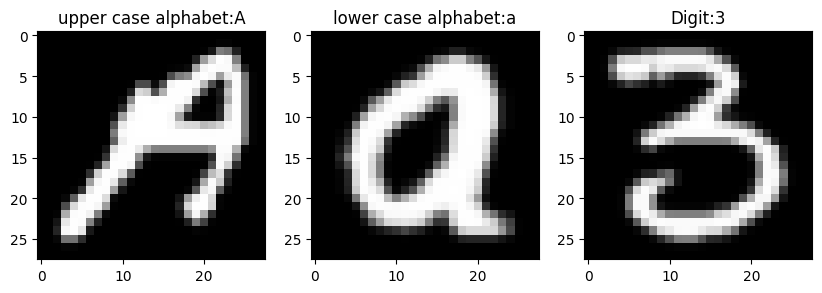

In [16]:
plt.figure(figsize=(10,12))
plt.subplot(1,3,1)
plt.imshow(np.transpose(trainset[trainset['45']==10].iloc[:,1:].iloc[11].values.reshape(28,28)),cmap='gray')
plt.title(f"upper case alphabet:{recog_chars[10]}")
plt.subplot(1,3,2)
plt.imshow(np.transpose(trainset[trainset['45']==36].iloc[:,1:].iloc[11].values.reshape(28,28)),cmap='gray')
plt.title(f"lower case alphabet:{recog_chars[36]}")
plt.subplot(1,3,3)
plt.imshow(np.transpose(trainset[trainset['45']==3].iloc[:,1:].iloc[11].values.reshape(28,28)),cmap='gray')
plt.title(f"Digit:{recog_chars[3]}")

**#preprocessing (Reshape)**

In [18]:
X_train=[]
for i in range(len(x_train)):
  test=np.transpose(x_train.iloc[i].values.reshape(28,28))
  X_train.append(test)
X_train=np.array(X_train)

In [19]:

X_test=[]
from skimage import transform
for i in range(len(x_test)):
  test=np.transpose(x_test.iloc[i].values.reshape(28,28))
  X_test.append(test)
X_test=np.array(X_test)


**Model Building**

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(53, activation='softmax')
])



In [22]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
1128/1128 [==============================] - 101s 88ms/step - loss: 1.0941 - accuracy: 0.6957
Epoch 2/10
1128/1128 [==============================] - 95s 84ms/step - loss: 0.4760 - accuracy: 0.8368
Epoch 3/10
1128/1128 [==============================] - 134s 119ms/step - loss: 0.4093 - accuracy: 0.8560
Epoch 4/10
1128/1128 [==============================] - 97s 86ms/step - loss: 0.3767 - accuracy: 0.8655
Epoch 5/10
1128/1128 [==============================] - 97s 86ms/step - loss: 0.3528 - accuracy: 0.8720
Epoch 6/10
1128/1128 [==============================] - 98s 86ms/step - loss: 0.3318 - accuracy: 0.8770
Epoch 7/10
1128/1128 [==============================] - 104s 92ms/step - loss: 0.3152 - accuracy: 0.8821
Epoch 8/10
1128/1128 [==============================] - 97s 86ms/step - loss: 0.2995 - accuracy: 0.8871
Epoch 9/10
1128/1128 [==============================] - 94s 83ms/step - loss: 0.2870 - accuracy: 0.8908
Epoch 10/10
1128/1128 [==============================] - 96s

In [23]:
y_pred=model.predict(X_test)

588/588 [==============================] - 6s 10ms/step


In [24]:
loss,accuracy=model.evaluate(X_test,y_test)

588/588 [==============================] - 8s 13ms/step - loss: 0.4088 - accuracy: 0.8667


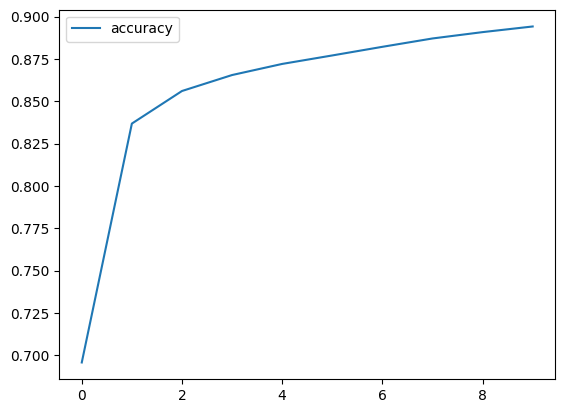

In [25]:
acc=history.history['accuracy']
plt.plot(acc,label="accuracy")
plt.legend()
plt.show()

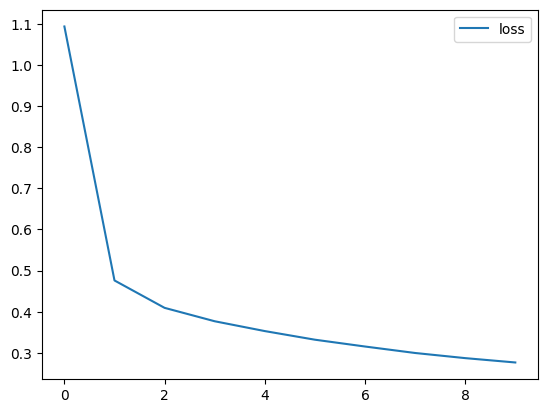

In [26]:
loss=history.history['loss']
plt.plot(loss,label='loss')
plt.legend()

In [27]:
from sklearn.metrics import accuracy_score,classification_report

In [28]:
y_pred=np.argmax(y_pred,axis=1)

In [29]:
accuracy_score(y_test,y_pred)

0.8666950369700516

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       400
           1       0.52      0.80      0.63       400
           2       0.95      0.80      0.87       400
           3       0.97      0.98      0.97       400
           4       0.93      0.88      0.91       400
           5       0.85      0.91      0.88       400
           6       0.92      0.91      0.92       400
           7       0.95      0.99      0.97       400
           8       0.94      0.90      0.92       400
           9       0.62      0.87      0.73       400
          10       0.95      0.96      0.96       400
          11       0.97      0.92      0.95       400
          12       0.93      0.95      0.94       400
          13       0.94      0.89      0.91       400
          14       0.98      0.95      0.97       400
          15       0.72      0.58      0.64       400
          16       0.89      0.95      0.92       400
          17       0.95    

**TESTING WITH NEW SAMPLE**

In [31]:
testset.sample().values

array([[  8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   5,  21,  37,  49,  69,  37,  21,   3,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  32, 127, 172, 215

In [32]:
# the value of first column is the output y i.e,8
# so the output should be
recog_chars[8]

'8'

In [33]:
x_sample=np.array([[ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   9,  32,  37,  37,  20,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   2,
          0,   0,   0,   0,   0,   0,   0,   1,  20,  50, 139, 204, 217,
        215, 159,  47,   5,   0,   0,   0,   0,   0,   0,   0,   4,  22,
         80,  80,   8,   0,   0,   0,   0,   0,   4,  36, 158, 220, 246,
        249, 250, 250, 246, 195,  45,   0,   0,   0,   0,   0,   0,  20,
        110, 172, 231, 231, 126,  32,   0,   0,   1,  33, 115, 177, 242,
        231, 140, 127, 127, 146, 236, 245, 114,   4,   0,   0,   0,   0,
          7,  95, 230, 252, 252, 252, 242, 131,  25,  21,  52, 163, 238,
        218, 170,  83,   9,   4,   4,  41, 218, 250, 127,   4,   0,   0,
          0,   0,  34, 202, 253, 247, 179, 179, 252, 234, 174, 174, 220,
        240, 195,  63,  21,   3,   0,   0,   0,  39, 217, 250, 127,   4,
          0,   0,   0,   2,  82, 233, 254, 222,  54,  37, 221, 254, 252,
        252, 253, 191,  56,   9,   1,   0,   0,   3,  22, 100, 234, 249,
        125,   4,   0,   0,   0,  22, 172, 252, 252, 172,  22,  34, 191,
        252, 254, 254, 254, 247, 222, 204, 140, 127, 129, 173, 232, 251,
        251, 175,  34,   0,   0,   0,   1,  70, 227, 254, 250, 136,  53,
        163, 248, 233, 217, 217, 217, 234, 253, 253, 250, 250, 250, 252,
        253, 246, 206,  78,   3,   0,   0,   0,   3,  94, 238, 254, 252,
        204, 211, 244, 175,  84,  39,  37,  39,  95, 202, 217, 233, 249,
        249, 233, 204, 127,  46,   7,   0,   0,   0,   0,   4, 124, 249,
        255, 254, 253, 245, 175,  34,   3,   0,   0,   0,   7,  32,  39,
         82, 125, 125,  82,  34,   8,   0,   0,   0,   0,   0,   0,   2,
         77, 206, 247, 249, 221, 158,  36,   0,   0,   0,   0,   0,   0,
          0,   0,   2,   4,   4,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7,  47, 163, 200,  64,  20,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,  32,  63,   7,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0]])

In [34]:
y_output=np.argmax(model.predict(np.transpose(x_sample.reshape(28,28,1))))
recog_chars[y_output]

1/1 [==============================] - 0s 28ms/step


'8'

Text(0.5, 1.0, 'character:8')

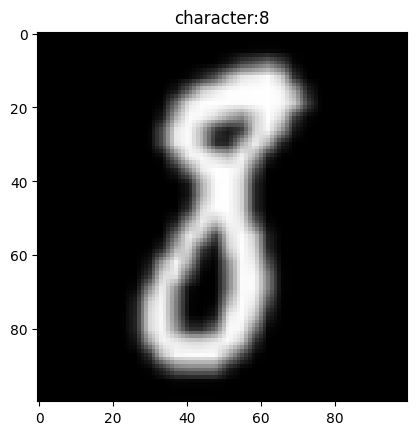

In [44]:
X_sample=transform.resize(np.transpose((x_sample).reshape(28,28)),(100,100))
plt.imshow(X_sample,cmap='gray')
plt.title(f"character:{recog_chars[y_output]}")

In [38]:
testset.sample().values

array([[ 44,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   4,   4,   2,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   7,  32,  37,  51, 114, 125,  82,
         33,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   4,  22,  95, 202, 217, 222, 245,
        249, 233, 190,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,  34, 115

In [39]:
# the value of first column is the output y i.e,44
# so the output should be
recog_chars[44]

'q'

In [40]:
x_sample2=np.array([[ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   4,   4,   2,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   7,  32,  37,  51, 114, 125,  82,
         33,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   4,  22,  95, 202, 217, 222, 245,
        249, 233, 190,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,  34, 115, 172, 232, 252, 250,
        245, 222, 236, 254, 240, 100,   3,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  20,  83, 175, 243, 245, 222,
        204, 140, 114,  59, 159, 251, 222,  50,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  10, 123, 230, 249, 232,
        159,  52,  32,   9,   5,  48, 209, 252, 202,  32,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  91, 221, 245,
        175,  83,  22,   1,   0,   0,  33, 164, 246, 221,  91,   7,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  90, 219,
        244, 163,  36,   3,   0,   0,   1,  23, 131, 243, 232, 123,  10,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        202, 246, 164,  35,   1,   0,   0,   3,  36, 159, 233, 242, 131,
         22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  39, 217, 208,  47,   1,   0,   0,   8,  79, 175, 245, 234,
        131,  32,   0,   0,   0,   0,   0,   0,   0,   2,   4,   2,   0,
          0,   0,   2,  82, 229, 140,   9,   0,   0,   7,  90, 219, 252,
        253, 191,  45,   6,   4,   4,   9,  32,  37,  37,  39,  82, 123,
         63,   2,   0,   0,   4, 124, 245, 141,  13,   4,   5,  48, 206,
        249, 252, 254, 236, 173, 129, 127, 127, 140, 204, 217, 217, 218,
        233, 245, 125,   4,   0,   0,   2,  82, 231, 222, 141, 127, 129,
        177, 227, 147, 177, 246, 254, 252, 250, 250, 250, 250, 254, 254,
        254, 254, 255, 250, 127,   4,   0,   0,   0,  22, 159, 245, 250,
        250, 247, 229, 154,  25,  36, 158, 215, 217, 217, 217, 217, 217,
        217, 217, 217, 223, 249, 250, 127,   4,   0,   0,   0,   1,  35,
        158, 215, 215, 170,  83,  22,   1,   1,  20,  37,  37,  37,  37,
         37,  37,  37,  37,  38,  83, 227, 250, 127,   4,   0,   0,   0,
          0,   1,  20,  37,  37,  21,   3,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   9, 127, 246, 245, 114,   4,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  32, 204, 253, 208,  46,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 222, 244,
        126,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4, 114,
        242, 175,  34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4, 112, 209,  79,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  30,  63,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0]])

In [41]:
y_sample2=np.argmax(model.predict(np.transpose(x_sample2.reshape(28,28,1))))
recog_chars[y_sample2]

1/1 [==============================] - 0s 23ms/step


'q'

In [42]:
from skimage import transform

Text(0.5, 1.0, 'character:q')

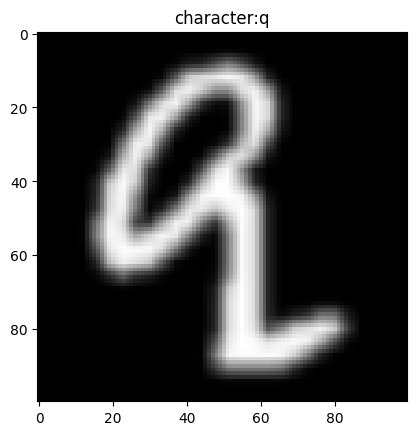

In [43]:
plt.imshow(transform.resize(np.transpose(x_sample2.reshape(28,28)),(100,100)),cmap='gray')
plt.title(f"character:{recog_chars[y_sample2]}")